## Milestone Project: 
Its a heart disease classifier and we're using the dataset from UCI/kagel

### 1. Importing tools for our workflow

In [1]:
#.Regular EDA imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#. Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#. Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### 2. Load Data & Data Exploration

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

#### 2.1 Data Exploration or EDA(Exploratory Data Analysis)
The goal is to become the subject matter expert on the data set that we're working on.
EDA Checklist:
1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can we add, remove, change the feature to get more out of our data?

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

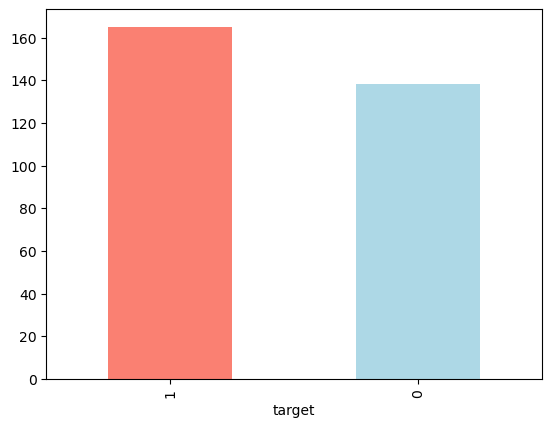

In [5]:
df["target"].value_counts().plot(kind="bar", color=['salmon','lightblue'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#. check for missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#. high level details of data set
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart disease fequency according to sex

In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

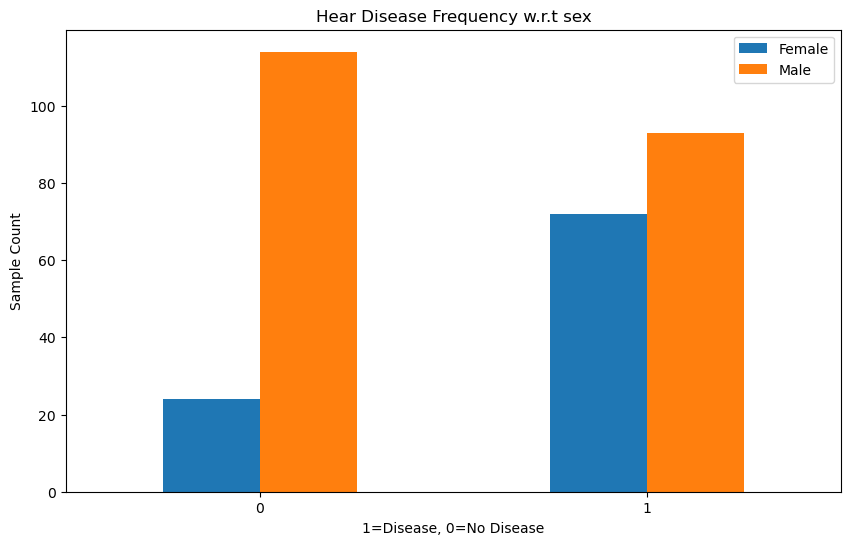

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6))
plt.title('Hear Disease Frequency w.r.t sex')
plt.xlabel('1=Disease, 0=No Disease')
plt.ylabel('Sample Count')
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

#### Age vs Max-Heartrate(Thalac)

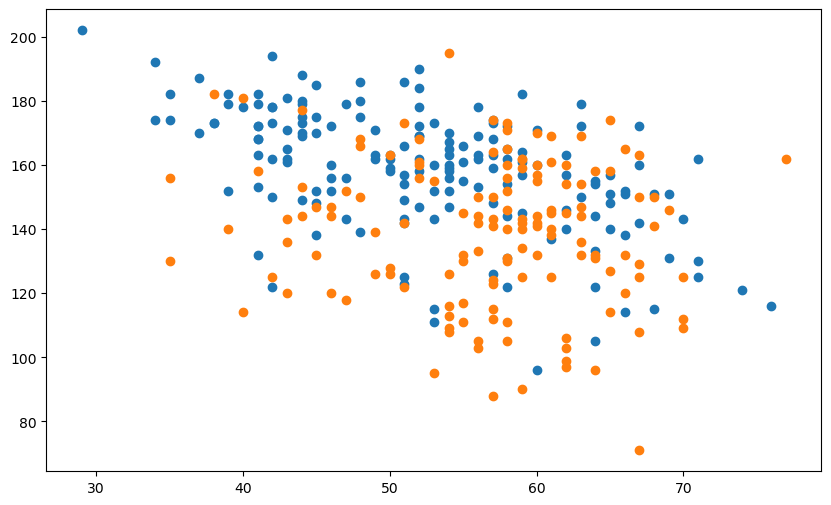

In [12]:
#Create fig
plt.figure(figsize=(10,6))
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           )
#Scatter with negative example
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0])

<Axes: ylabel='Frequency'>

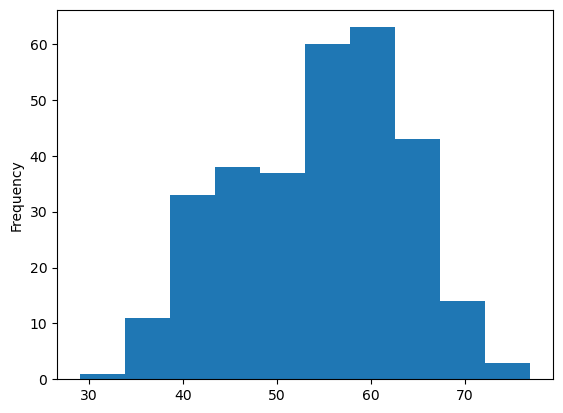

In [13]:
#Check the distribution of data with histogram
df.age.plot(kind='hist')

In [14]:
 #Check the chest pain type and target
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

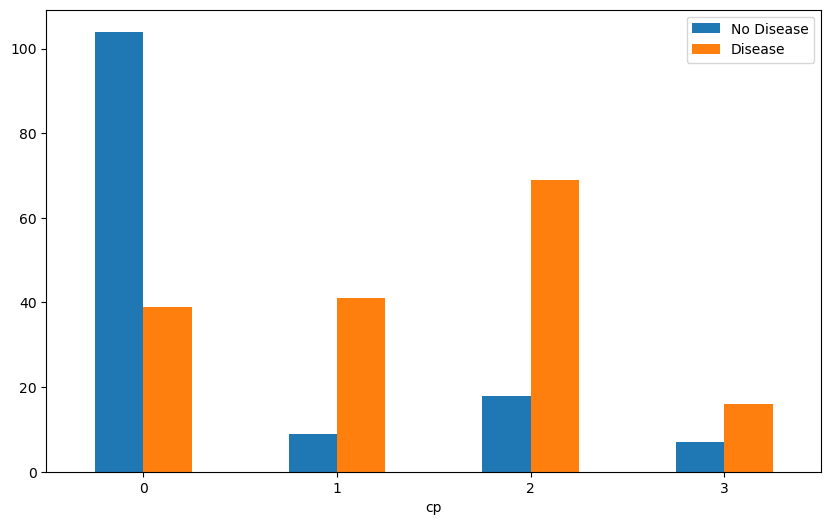

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6))
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [16]:
df.sample(frac=0.3).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1


In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


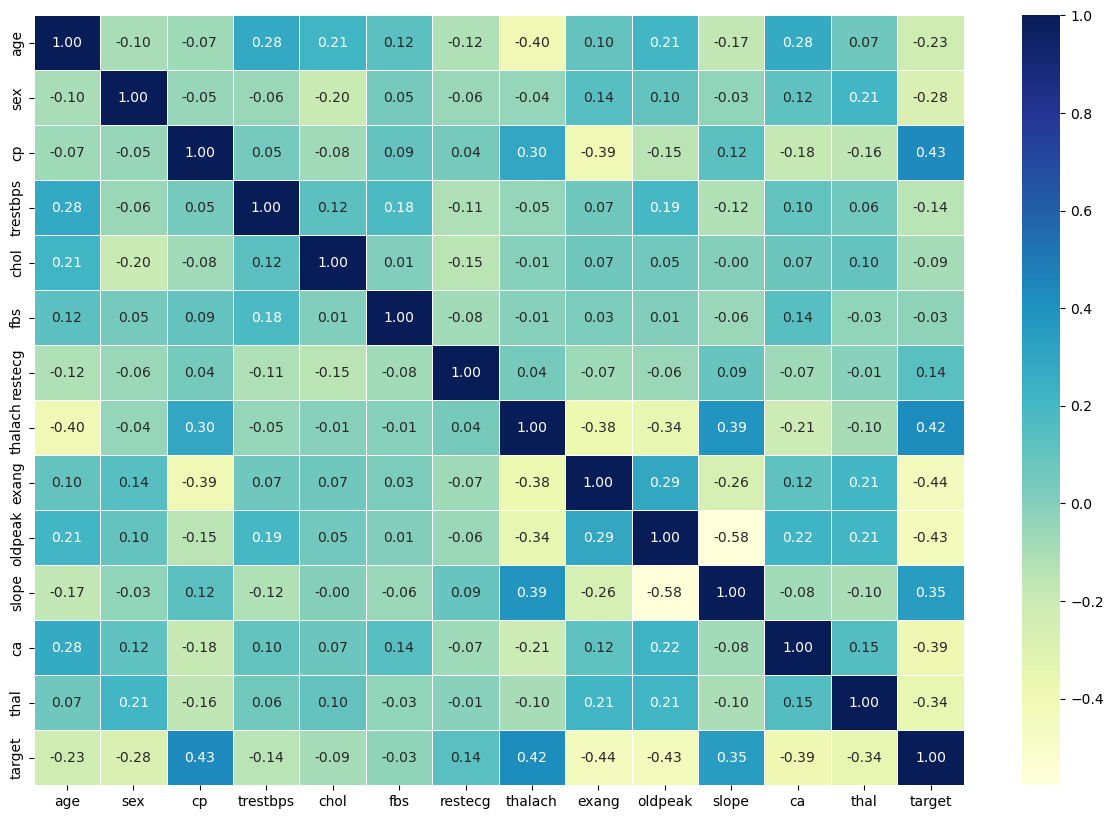

In [18]:
# Visualize Correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");


### 3. Modelling

In [19]:
#. Split Data in X,Y
X=df.drop('target',axis=1)
Y=df.target

X_train, X_test, Y_train, Y_test=train_test_split(X,Y)

Now we need to try out diffrent ML models.
We're trying with 3 models namely:
1. Logistic Regression
2. K-nearest Neighbor Classifier
3. RandomForest

In [20]:
models={
    "LogReg": LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier()
}

#.Function to FIT and TRAIN the model
def fit_and_score(models,x_train, x_test, y_train, y_test):
    """Function to Fit and Score the data using various models.
    Params: X_test, X_train, Y_test, Y_train
    Models: models dictionary
    """
    #.Set Random seed
    np.random.seed(42)
    
    #.Dict to track scores
    model_scores={}
    
    #.Loop through models
    for name,model in models.items():
        #.Fitting Data
        model.fit(X_train,Y_train)
        #.Evaluating Model and add to model_scores
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [21]:
model_scores=fit_and_score(models=models,
                           x_train=X_train,
                           x_test=X_test,
                           y_train=Y_train,
                           y_test=Y_test)
model_scores

E:\Git Repos\python-ml\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogReg': 0.8552631578947368,
 'KNN': 0.5921052631578947,
 'RandomForest': 0.868421052631579}

<Axes: >

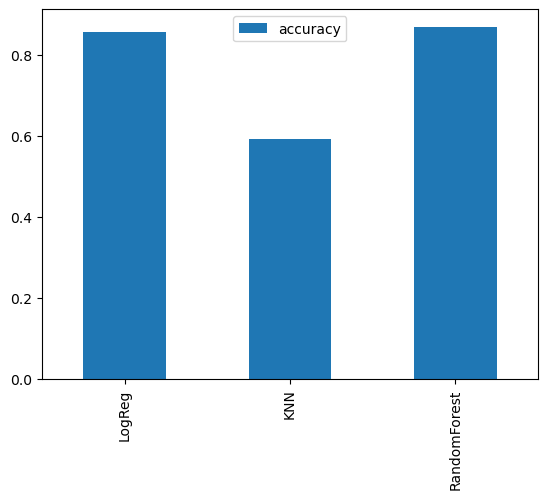

In [22]:
#. model comparrison
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
# model_compare, model_compare.T
model_compare.T.plot(kind="bar")

Now we've baseline model time to inncrease the efficieny by hyperparam tuning
Lets take a look at following:
* Hyperparam tuning
* Feature Importance
* Cross-validation
* Confusion matrix
* Precision
* Recall
* F1-Score
* Classification Report
* Roc Curve
* Area under Curve(AUC)

#### Hyper parameter tuning

In [23]:
#. Tuning KNN
train_scores=[]
test_scores=[]

#.Create list of different values for n-neigbors
neigbhors=range(1,21)

#setup Knn instance
knn=KNeighborsClassifier()

#Loop through n-neigbhors
for i in neigbhors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

train_scores,test_scores

([1.0,
  0.8105726872246696,
  0.7929515418502202,
  0.7841409691629956,
  0.7709251101321586,
  0.748898678414097,
  0.7400881057268722,
  0.7268722466960352,
  0.73568281938326,
  0.7444933920704846,
  0.7268722466960352,
  0.7312775330396476,
  0.7400881057268722,
  0.73568281938326,
  0.7224669603524229,
  0.7400881057268722,
  0.7136563876651982,
  0.7180616740088106,
  0.7004405286343612,
  0.7268722466960352],
 [0.5526315789473685,
  0.5921052631578947,
  0.631578947368421,
  0.6578947368421053,
  0.5921052631578947,
  0.6447368421052632,
  0.6578947368421053,
  0.6578947368421053,
  0.6447368421052632,
  0.618421052631579,
  0.6052631578947368,
  0.6052631578947368,
  0.5921052631578947,
  0.5789473684210527,
  0.631578947368421,
  0.631578947368421,
  0.6710526315789473,
  0.631578947368421,
  0.6447368421052632,
  0.6447368421052632])

Max KNN Score on test data: 67.11


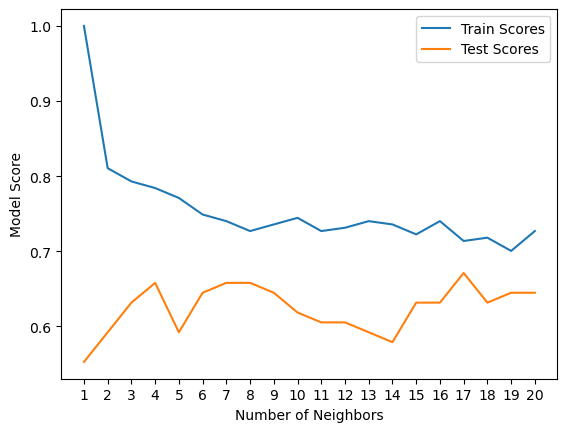

In [24]:
plt.plot(neigbhors,train_scores,label="Train Scores")
plt.plot(neigbhors,test_scores,label="Test Scores")
plt.xticks(range(1,21))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Max KNN Score on test data: {max(test_scores)*100:.2f}")

#### HyParam tuning with RandomizedSearchCV
We're going to tune
* Logistic Regression
* RandomForestClassifier

In [25]:
#.Create Hyperparameter grid for Logistic Regression
log_reg_grid={
    "C": np.logspace(-4,4,30),
    "solver": ["liblinear"]
}
#.RandomForestClassifier Grid
rf_grid={
    "n_estimators": np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split": np.arange(1,10,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [26]:
#.Tuning using RandomizeSearchCV
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(estimator=LogisticRegression(),
                              param_distributions=log_reg_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

#.Fit Random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.20433597178569418}

In [28]:
rs_log_reg.score(X_test,Y_test)

0.8289473684210527

In [29]:
#.Tuning RandomForestClassifier
np.random.seed(42)
rf_grid_cv=RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=10,
                             verbose=True)
rf_grid_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


E:\Git Repos\python-ml\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Git Repos\python-ml\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Git Repos\python-ml\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "E:\Git Repos\python-ml\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([1, 3, 5, 7, 9]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rf_grid_cv.best_params_

{'n_estimators': 710,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [31]:
rf_grid_cv.score(X_test,Y_test)

0.8552631578947368

#### HyParam Tuning using GridSearchCV

In [32]:
gs_log_reg=GridSearchCV(estimator=LogisticRegression(),param_grid=log_reg_grid,cv=8,verbose=True)
gs_log_reg.fit(X_train,Y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log_reg.score(X_test,Y_test)

0.8552631578947368

### 4.Evaluating the Model

#### Evaluating our Classifier ML model beyond accuracy
* ROC, AUC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score.
  
To Evaluate we need to make the predictions.

In [34]:
#.Make Predictions with tuned model
Y_preds=gs_log_reg.predict(X_test)
Y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

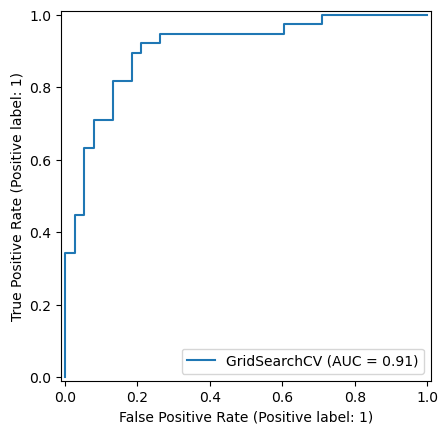

In [35]:
#.Import ROC and AUC
# from sklearn.metrics import auc,roc_curve
# fpr, tpr, thresholds = roc_curve(Y_test,Y_preds)
# roc_auc=auc(fpr,tpr)
# display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name="GridSearchCV")
# display.plot()
RocCurveDisplay.from_estimator(estimator=gs_log_reg,X=X_test,y=Y_test)
# RocCurveDisplay.from_predictions(y_true=Y_test,y_pred=Y_preds)

In [36]:
print(confusion_matrix(Y_test,Y_preds))

[[30  8]
 [ 3 35]]


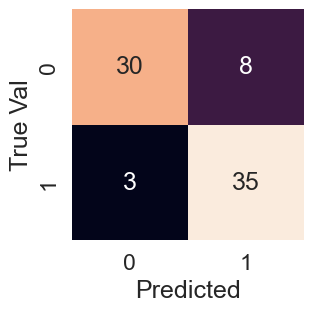

In [37]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """Plot heatmap for confusion matrix"""
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True Val")

plot_conf_mat(Y_test,Y_preds)

Now that we've calculated the confusion matrix, ROC curve lets get Classification report as well as
cross validated precision, recall, & f1-score

In [38]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.81      0.92      0.86        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.85        76
weighted avg       0.86      0.86      0.85        76



#### Calculate evaluation metrics using cross-validation
We'll be using cross_val_score() to calculate accuracy,precision,recall,f1

In [39]:
#.Create new classifier with best parameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [40]:
clf=LogisticRegression(C= 2.592943797404667, solver="liblinear")

In [59]:
#.CV Accuracy
cv_acc=cross_val_score(estimator=clf,X=X,y=Y, cv=5,scoring='accuracy')
cv_acc=cv_acc.mean()
#.CV Precision
cv_prc=cross_val_score(estimator=clf,X=X,y=Y, cv=5,scoring='precision')
cv_prc=cv_prc.mean()
#.CV Recall
cv_recall=cross_val_score(estimator=clf,X=X,y=Y, cv=5,scoring='recall')
cv_recall=cv_recall.mean()
#.CV F1
cv_f1=cross_val_score(estimator=clf,X=X,y=Y, cv=5,scoring='f1')
cv_f1=cv_f1.mean()

In [62]:
for score in [cv_acc,cv_prc,cv_recall,cv_f1]:
    print(f"Avg :{score*100:.2f}")

Avg :82.49
Avg :81.88
Avg :87.88
Avg :84.64
